In [2]:
!pip install xgboost

In [ ]:
import pandas as pd 
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
# elalgo ely hsht8l beh 
from xgboost import XGBRegressor

# to measer the preformence of the algo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [4]:
sklearn.datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# top 5
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:

df.head(10)

,crime,zone,industry,near_river,pollution,rooms,age,distance,highway,tax,ratio,black,low_income,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


data cleaing:


In [21]:
df.isnull().sum()

crime         0
zone          0
industry      0
near_river    0
pollution     0
rooms         0
age           0
distance      0
highway       0
tax           0
ratio         0
black         0
low_income    0
medv          0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df = df.astype({
    'chas': 'float64',
    'tax': 'float64',
    'rad': 'float64'
})


In [8]:
df = df.rename(columns={
    'crim': 'crime',
    'zn': 'zone',
    'indus': 'industry',
    'chas': 'near_river',
    'nox': 'pollution',
    'rm': 'rooms',
    'age': 'age',
    'dis': 'distance',
    'rad': 'highway',
    'tax': 'tax',
    'ptratio': 'ratio',
    'b': 'black',
    'lstat': 'low_income',
    
})



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   crime       506 non-null    float64
 1   zone        506 non-null    float64
 2   industry    506 non-null    float64
 3   near_river  506 non-null    float64
 4   pollution   506 non-null    float64
 5   rooms       506 non-null    float64
 6   age         506 non-null    float64
 7   distance    506 non-null    float64
 8   highway     506 non-null    float64
 9   tax         506 non-null    float64
 10  ratio       506 non-null    float64
 11  black       506 non-null    float64
 12  low_income  506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.corr()
# b3rf 3lakt ben el cols w b3dha

,crime,zone,industry,near_river,pollution,rooms,age,distance,highway,tax,ratio,black,low_income,medv
crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
industry,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
near_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
pollution,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
highway,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

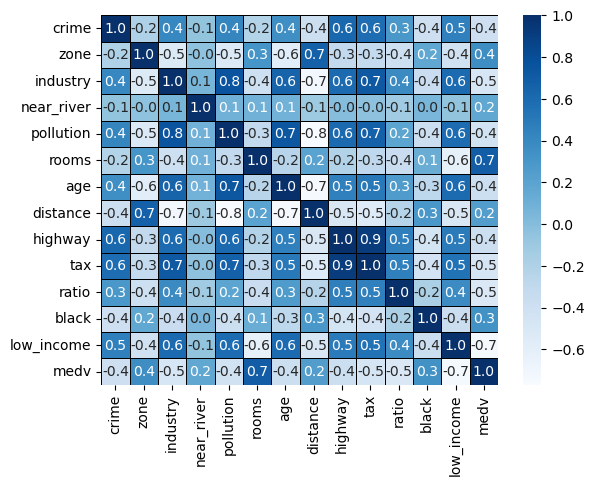

In [12]:
sns.heatmap(df.corr(),annot=True,fmt='.1f', linewidths= .5, linecolor= 'black' , cmap='Blues')
# fmt bt2rb el rkm 0.399 ---> 0.3

In [13]:
# module
# tl3t el medv mn el dataframe 3shan fe el x 3shan a3rf a5mno
x=df.drop('medv' , axis=1)
# oltlo el y hwa el price ely h5mno
y= df.medv

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [15]:
# BN7DD EL ALGORTIM
model1= XGBRegressor()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)


In [16]:
metric1=r2_score(y_test,pred)
metric1
# y_test de eldata el real w pred de ely bgrb feha el algo sh8al wla l2
#  w b3mlhom compare ashof homa shbh b3d wla l2 b r2_score

0.9053681251156911

In [17]:
metric2= mean_absolute_error(y_test,pred)
metric2

# mean_absolute_error byshof nsbt el error ad eh 


1.8260620715571385

test the model:

In [22]:
new_house = pd.DataFrame({
    'crime': [0.1],
    'zone': [12],
    'industry': [3],
    'near_river': [0],
    'pollution': [0.45],
    'rooms': [6],
    'age': [65],
    'distance': [4.2],
    'highway': [5],
    'tax': [300],
    'ratio': [18],
    'black': [390],
    'low_income': [7]
})
predicted_price= model1.predict(new_house)

print(predicted_price)


[22.823452]
